LLM-as-a-judge eval

In [1]:
import pandas as pd


In [2]:
# Define paths and sheet names
file_path = "/Users/pavankumarsv/projects/micro1/stanford-v4-main/Human vs. AI Interviews.xlsx"

In [3]:
# Define a list of sheet names to read from the Excel file
sheet_names = ["human round 1", "human round 2", "human round 3", "human round 4", "human round 5", 
"ai round 1", "ai round 2", "ai round 3", "ai round 4", "ai round 5"]

# Use a dictionary comprehension to read each sheet into a DataFrame
# The key in the dictionary is the sheet name, and the value is the corresponding DataFrame
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names}

In [4]:
print(len(dataframes["human round 1"]))
print(len(dataframes["human round 2"]))
print(len(dataframes["human round 3"]))
print(len(dataframes["human round 4"]))
print(len(dataframes["human round 5"]))
print(len(dataframes["ai round 1"]))
print(len(dataframes["ai round 2"]))
print(len(dataframes["ai round 3"]))
print(len(dataframes["ai round 4"]))
print(len(dataframes["ai round 5"]))
target_size = len(dataframes["human round 1"])


575
575
575
575
575
575
575
575
575
575


In [5]:
# Create a dictionary to store random samples from each DataFrame
# The key in the dictionary is the sheet name, and the value is a randomly sampled subset of the DataFrame
random_samples = {
    sheet: df.sample(n=target_size, random_state=42) for sheet, df in dataframes.items()
}

# `df.sample` is used to randomly select `target_size` rows from each DataFrame
# `random_state=42` ensures reproducibility of the random sampling
# `dataframes.items()` iterates over the sheet names and their corresponding DataFrames

In [6]:
# Create a dictionary to calculate mean values for conversational and technical columns in each sampled DataFrame
# The key in the dictionary is the sheet name, and the value is another dictionary with calculated means
means = {
    sheet: {
        "Conversational Quality": df["conversational_quality_overall_score"].mean(),
        "Technical Quality": df["technical_quality_overall_score"].mean()
    }
    for sheet, df in random_samples.items()
}

In [7]:
# Initialize the summary_means dictionary
summary_means = {"human round": {"Conversational Quality": 0, "Technical Quality": 0},
          "ai round": {"Conversational Quality": 0, "Technical Quality": 0}}

# Counters for the number of rounds
human_rounds = 0
ai_rounds = 0

# Calculate the averages
for key, values in means.items():
    if key.startswith("human round"):
        human_rounds += 1
        summary_means["human round"]["Conversational Quality"] += values["Conversational Quality"]
        summary_means["human round"]["Technical Quality"] += values["Technical Quality"]
    elif key.startswith("ai round"):
        ai_rounds += 1
        summary_means["ai round"]["Conversational Quality"] += values["Conversational Quality"]
        summary_means["ai round"]["Technical Quality"] += values["Technical Quality"]

summary_means["human round"]["Conversational Quality"] = round(summary_means["human round"]["Conversational Quality"] / human_rounds, 2)
summary_means["human round"]["Technical Quality"] = round(summary_means["human round"]["Technical Quality"] / human_rounds, 2)
summary_means["ai round"]["Conversational Quality"] = round(summary_means["ai round"]["Conversational Quality"] / ai_rounds, 2)
summary_means["ai round"]["Technical Quality"] = round(summary_means["ai round"]["Technical Quality"] / ai_rounds, 2)


print(summary_means)

{'human round': {'Conversational Quality': 5.41, 'Technical Quality': 7.85}, 'ai round': {'Conversational Quality': 7.8, 'Technical Quality': 8.37}}


In [8]:
categories = list(summary_means.keys())
conversational_means = [summary_means[cat]["Conversational Quality"] for cat in categories]
technical_means = [summary_means[cat]["Technical Quality"] for cat in categories]

In [9]:
summary_means

{'human round': {'Conversational Quality': 5.41, 'Technical Quality': 7.85},
 'ai round': {'Conversational Quality': 7.8, 'Technical Quality': 8.37}}

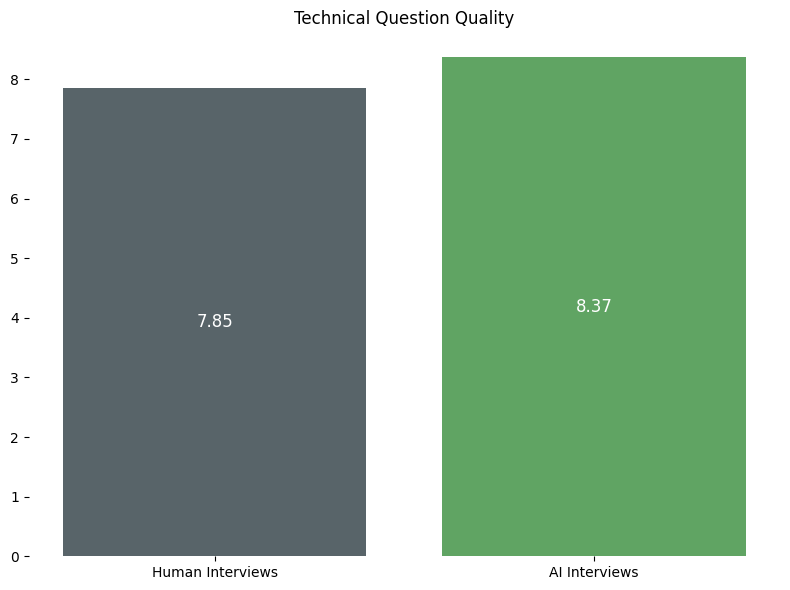

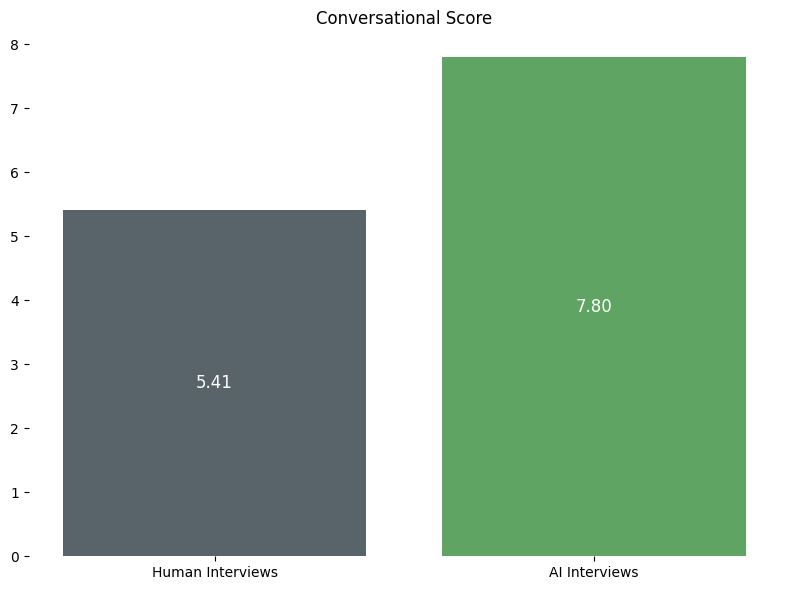

In [10]:
import matplotlib.pyplot as plt

colors = ['#2E3D44', '#388E3C']


categories_labels_map = {
    "human round" : "Human Interviews",
    "ai round" : "AI Interviews"
}
categories_labels = [categories_labels_map[val] for val in categories]
# Plot for Technical Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, technical_means, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Technical Score")
plt.title("Technical Question Quality")
plt.tight_layout()
plt.show()

# Plot for Conversational Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, conversational_means, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Conversational Score")
plt.title("Conversational Score")
plt.tight_layout()
plt.show()

In [11]:
# Create a dictionary to calculate standard deviations for conversational and technical columns in each sampled DataFrame
# The key in the dictionary is the sheet name, and the value is another dictionary with calculated standard deviations
stddevs = {
    sheet: {
        "Conversational Quality": df["conversational_quality_overall_score"].std(),
        "Technical Quality": df["technical_quality_overall_score"].std()
    }
    for sheet, df in random_samples.items()
}

In [12]:
#To summarize all rounds into 2 categories, human round and ai round for plotting.
summary_stddevs = {"human round": {"Conversational Quality": 0, "Technical Quality": 0},
          "ai round": {"Conversational Quality": 0, "Technical Quality": 0}}

# Counters for the number of rounds
human_rounds = 0
ai_rounds = 0

# Calculate the averages
for key, values in stddevs.items():
    if key.startswith("human round"):
        human_rounds += 1
        summary_stddevs["human round"]["Conversational Quality"] += values["Conversational Quality"]
        summary_stddevs["human round"]["Technical Quality"] += values["Technical Quality"]
    elif key.startswith("ai round"):
        ai_rounds += 1
        summary_stddevs["ai round"]["Conversational Quality"] += values["Conversational Quality"]
        summary_stddevs["ai round"]["Technical Quality"] += values["Technical Quality"]

summary_stddevs["human round"]["Conversational Quality"] = round(summary_stddevs["human round"]["Conversational Quality"] / human_rounds, 5)
summary_stddevs["human round"]["Technical Quality"] = round(summary_stddevs["human round"]["Technical Quality"] / human_rounds, 5)
summary_stddevs["ai round"]["Conversational Quality"] = round(summary_stddevs["ai round"]["Conversational Quality"] / ai_rounds, 5)
summary_stddevs["ai round"]["Technical Quality"] = round(summary_stddevs["ai round"]["Technical Quality"] / ai_rounds, 5)


print(summary_stddevs)

{'human round': {'Conversational Quality': 1.25439, 'Technical Quality': 0.78444}, 'ai round': {'Conversational Quality': 0.47456, 'Technical Quality': 0.45323}}


In [13]:
categories = list(summary_stddevs.keys())
conversational_stddevs = [summary_stddevs[cat]["Conversational Quality"] for cat in categories]
technical_stddevs = [summary_stddevs[cat]["Technical Quality"] for cat in categories]

In [14]:
print(technical_stddevs)

[0.78444, 0.45323]


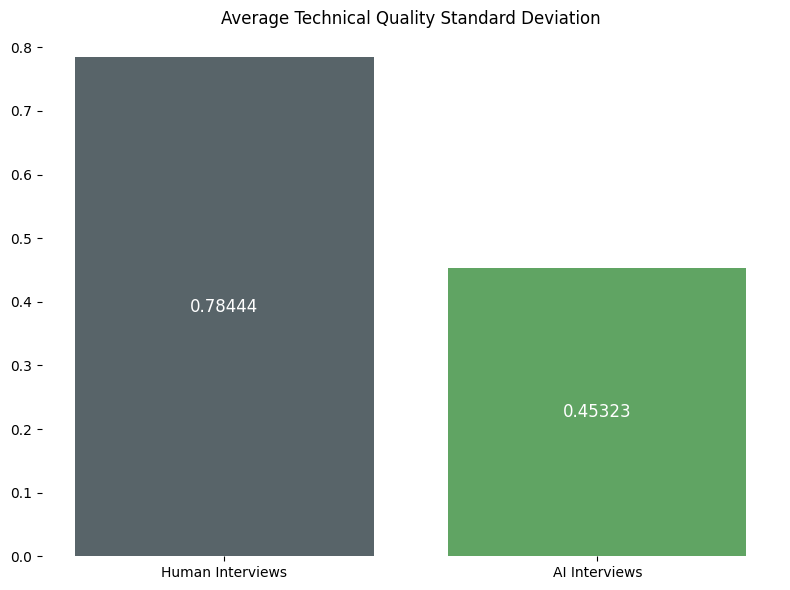

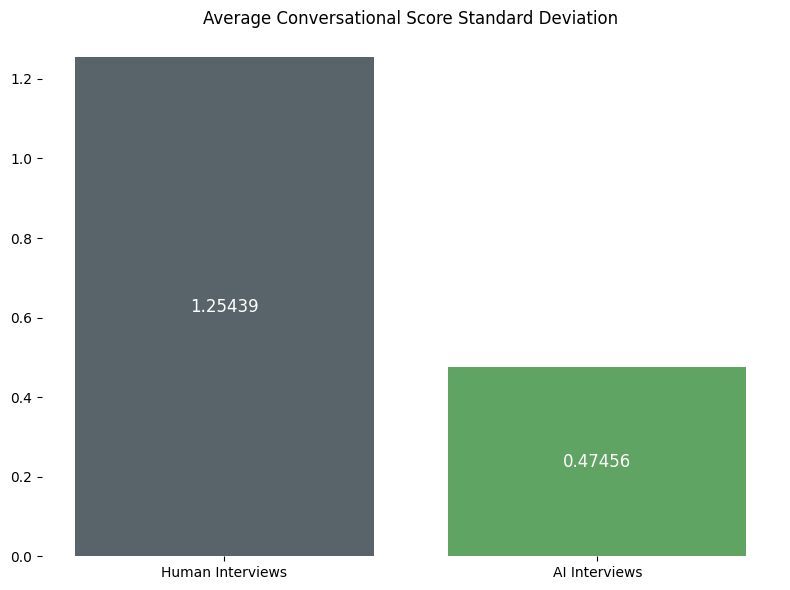

In [15]:
colors = ['#2E3D44', '#388E3C']

categories_labels_map = {
    "human round" : "Human Interviews",
    "ai round" : "AI Interviews"
}
categories_labels = [categories_labels_map[val] for val in categories]
# Plot for Technical Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, technical_stddevs, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Technical Score")
plt.title("Average Technical Quality Standard Deviation")
plt.tight_layout()
plt.show()

# Plot for Conversational Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, conversational_stddevs, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Conversational Score")
plt.title("Average Conversational Score Standard Deviation")
plt.tight_layout()
plt.show()

Human eval of same metrics

In [16]:
file_path = "/Users/pavankumarsv/projects/micro1/stanford-v4-main/[Responses] Human Evals for AI vs. Human interviews.xlsx"

In [17]:
# Define a list of sheet names to read from the Excel file
# Each sheet corresponds to a specific batch of human evaluations
sheet_names = ["human evaluation - batch 1", "human evaluation - batch 2", "human evaluation - batch 3", "human evaluation - batch 4", "human evaluation - batch 5", 
"human evaluation - batch 6", "human evaluation - batch 7"]

# Use a dictionary comprehension to read each sheet into a DataFrame
# The key in the dictionary is the sheet name, and the value is the corresponding DataFrame
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names}

In [18]:
# Initialize empty lists to store AI and human evaluation records

ai_records = []  # List to store the first 5 rows (AI records) from each sheet
human_records = []  # List to store the last 5 rows (human records) from each sheet

# Initialize empty lists to store means and standard deviations for AI and human records
conv_ai_means = []  # Conversational Quality means for AI records
tech_ai_means = []  # Technical Quality means for AI records

conv_human_means = []  # Conversational Quality means for human records
tech_human_means = []  # Technical Quality means for human records

conv_ai_stds = []  # Conversational Quality standard deviations for AI records
tech_ai_stds = []  # Technical Quality standard deviations for AI records

conv_human_stds = []  # Conversational Quality standard deviations for human records
tech_human_stds = []  # Technical Quality standard deviations for human records


# Process each sheet
for sheet_name, df in dataframes.items():
    # Append the first 5 rows for AI records
    ai_records.append(df.head(5))
    
    # Append the last 5 rows for human records
    human_records.append(df.tail(5))

    # Calculate and store the mean and standard deviation for Conversational Quality in AI records
    convr_ai_mean = df.head(5)["conversational_quality_overall_score"].mean()
    conv_ai_means.append(convr_ai_mean)

    convr_ai_std = df.head(5)["conversational_quality_overall_score"].std()
    conv_ai_stds.append(convr_ai_std)

    # Calculate and store the mean and standard deviation for Conversational Quality in human records
    convr_human_mean = df.tail(5)["conversational_quality_overall_score"].mean()
    conv_human_means.append(convr_human_mean)

    convr_human_std = df.tail(5)["conversational_quality_overall_score"].std()
    conv_human_stds.append(convr_human_std)

    # Calculate and store the mean and standard deviation for Technical Quality in AI records
    tech_ai_mean = df.head(5)["technical_quality_overall_score"].mean()
    tech_ai_means.append(tech_ai_mean)

    tech_ai_std = df.head(5)["technical_quality_overall_score"].std()
    tech_ai_stds.append(tech_ai_std)

    # Calculate and store the mean and standard deviation for Technical Quality in human records
    tech_human_mean = df.tail(5)["technical_quality_overall_score"].mean()
    tech_human_means.append(tech_human_mean)

    tech_human_std = df.tail(5)["technical_quality_overall_score"].std()
    tech_human_stds.append(tech_human_std)


# Concatenate all AI and human records into separate DataFrames
df_ai = pd.concat(ai_records, ignore_index=True)
df_human = pd.concat(human_records, ignore_index=True)

In [19]:
# Create a dictionary to summarize the mean values for both human and AI rounds
summary_means = {
    'human round': {
        'Conversational Quality': df_human["conversational_quality_overall_score"].mean(), 
        'Technical Quality': df_human["technical_quality_overall_score"].mean()
        },
    'ai round': {
        'Conversational Quality': df_ai["conversational_quality_overall_score"].mean(), 
        'Technical Quality': df_ai["technical_quality_overall_score"].mean()
        }
}

In [20]:
categories = list(summary_means.keys())
conversational_means = [summary_means[cat]["Conversational Quality"] for cat in categories]
technical_means = [summary_means[cat]["Technical Quality"] for cat in categories]

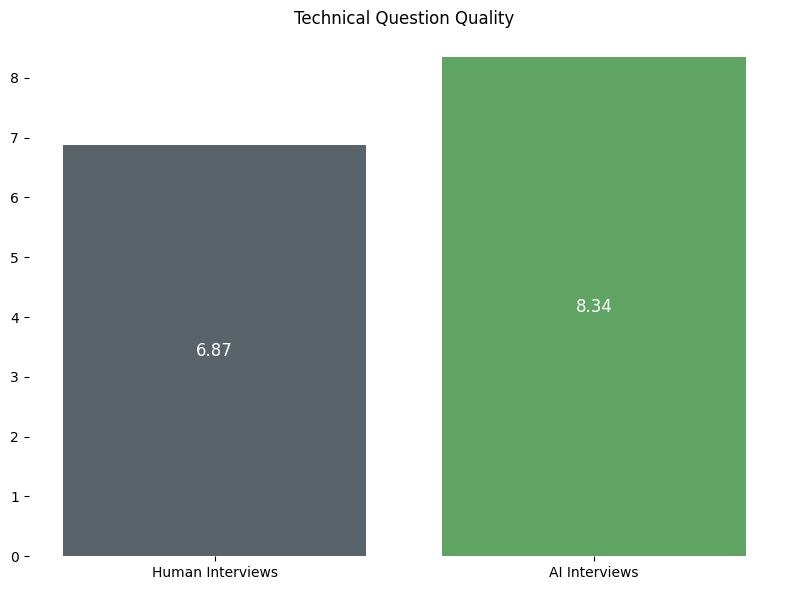

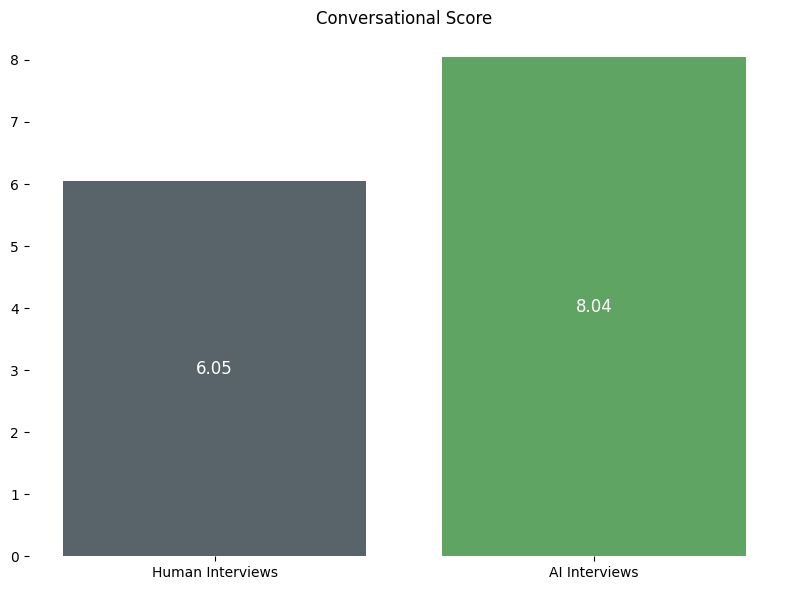

In [21]:
import matplotlib.pyplot as plt

colors = ['#2E3D44', '#388E3C']


categories_labels_map = {
    "human round" : "Human Interviews",
    "ai round" : "AI Interviews"
}
categories_labels = [categories_labels_map[val] for val in categories]
# Plot for Technical Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, technical_means, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Technical Score")
plt.title("Technical Question Quality")
plt.tight_layout()
plt.show()

# Plot for Conversational Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, conversational_means, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Conversational Score")
plt.title("Conversational Score")
plt.tight_layout()
plt.show()

In [22]:
# Create a dictionary to summarize the standard deviations for both human and AI rounds
summary_stds = {
    'human round': {
        'Conversational Quality': round(df_human["conversational_quality_overall_score"].std(), 5),
        'Technical Quality': round(df_human["technical_quality_overall_score"].std(), 5)
        },
    'ai round': {
        'Conversational Quality': round(df_ai["conversational_quality_overall_score"].std(), 5), 
        'Technical Quality': round(df_ai["technical_quality_overall_score"].std(), 5)
        }
}

In [23]:
categories = list(summary_stds.keys())
conversational_stddevs = [summary_stds[cat]["Conversational Quality"] for cat in categories]
technical_stddevs = [summary_stds[cat]["Technical Quality"] for cat in categories]

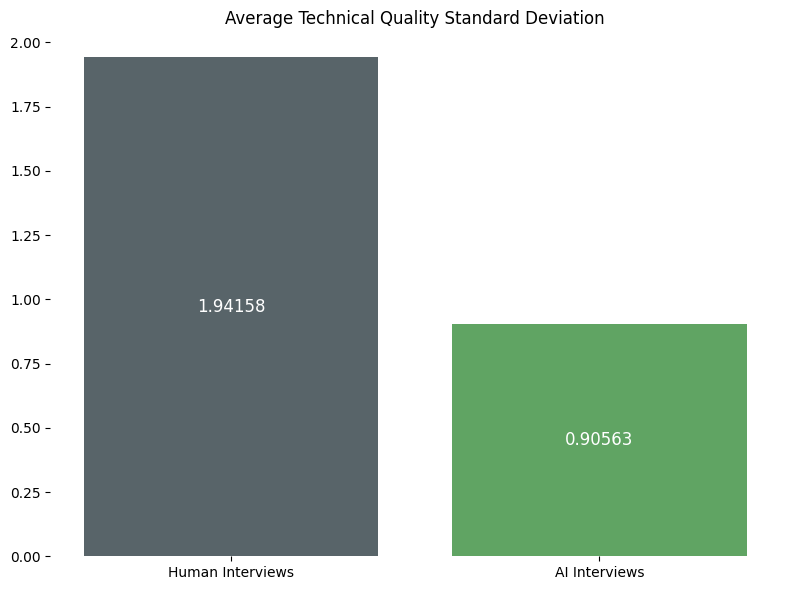

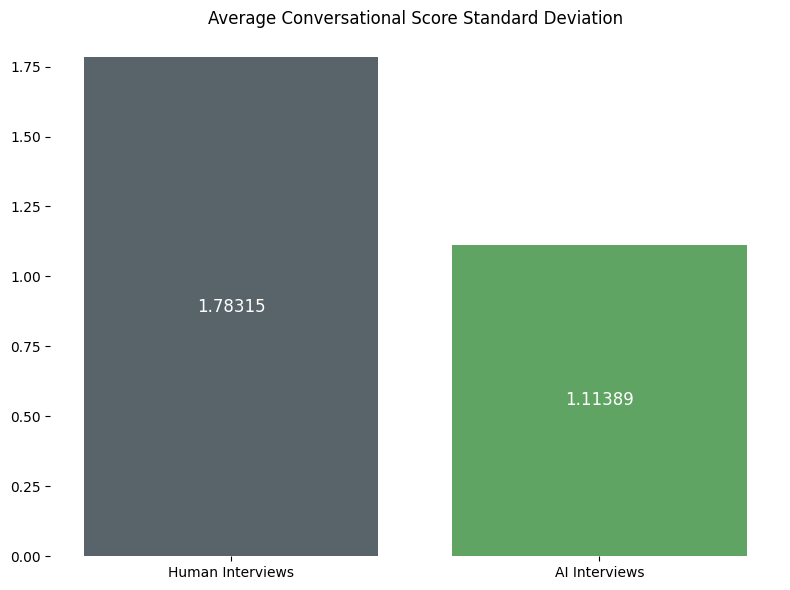

In [24]:
colors = ['#2E3D44', '#388E3C']

categories_labels_map = {
    "human round" : "Human Interviews",
    "ai round" : "AI Interviews"
}
categories_labels = [categories_labels_map[val] for val in categories]
# Plot for Technical Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, technical_stddevs, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Technical Score")
plt.title("Average Technical Quality Standard Deviation")
plt.tight_layout()
plt.show()

# Plot for Conversational Quality
plt.figure(figsize=(8, 6))
bars = plt.bar(categories_labels, conversational_stddevs, color=colors[:len(categories)], alpha=0.8)

# Add mean values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=12)

# Remove outer borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel("Categories")
# plt.ylabel("Mean Conversational Score")
plt.title("Average Conversational Score Standard Deviation")
plt.tight_layout()
plt.show()